# Chapter 3

All ones or all zeros tensors

In [1]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [3]:
x = tf.random.normal(shape=(3,1),mean=0,stddev=1)
print(x)

tf.Tensor(
[[-0.00102094]
 [-0.7705348 ]
 [-0.4687116 ]], shape=(3, 1), dtype=float32)


In [4]:
x=tf.random.uniform(shape=(3,1),minval=0,maxval=1)
print(x)

tf.Tensor(
[[0.95861757]
 [0.5157372 ]
 [0.30541074]], shape=(3, 1), dtype=float32)


Creating a TensorFlow variable

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.41479152],
       [0.17070821],
       [1.3645182 ]], dtype=float32)>


Assigning a value to a TensorFlow variable

In [6]:
v.assign(tf.ones((3, 1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Assigning a value to a subset of a TensorFlow variable

In [7]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Using assign_add()

In [8]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

A few basic math operations

In [9]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

# Gradient tape

In [17]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient.numpy()

6.0

Using nested gradient tapes to compute second-order gradients (second deravative)

In [19]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration.numpy())
speed.numpy()

9.8


0.0

# Data generation for simple binary classification

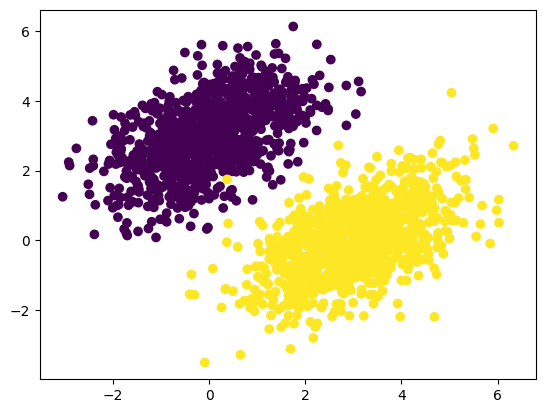

In [23]:
import numpy as np
num_samples_per_class =1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class  
)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))  

import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

# Simple linear classifier model

In [25]:
input_dim =2
output_dim = 1

w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs,w) + b

In [26]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

In [32]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [w, b])
    w.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss
    

In [33]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.8198
Loss at step 1: 0.3693
Loss at step 2: 0.1589
Loss at step 3: 0.1199
Loss at step 4: 0.1072
Loss at step 5: 0.0990
Loss at step 6: 0.0921
Loss at step 7: 0.0859
Loss at step 8: 0.0803
Loss at step 9: 0.0753
Loss at step 10: 0.0706
Loss at step 11: 0.0665
Loss at step 12: 0.0627
Loss at step 13: 0.0592
Loss at step 14: 0.0561
Loss at step 15: 0.0532
Loss at step 16: 0.0506
Loss at step 17: 0.0483
Loss at step 18: 0.0461
Loss at step 19: 0.0442
Loss at step 20: 0.0424
Loss at step 21: 0.0408
Loss at step 22: 0.0394
Loss at step 23: 0.0381
Loss at step 24: 0.0369
Loss at step 25: 0.0358
Loss at step 26: 0.0348
Loss at step 27: 0.0339
Loss at step 28: 0.0331
Loss at step 29: 0.0323
Loss at step 30: 0.0317
Loss at step 31: 0.0311
Loss at step 32: 0.0305
Loss at step 33: 0.0300
Loss at step 34: 0.0295
Loss at step 35: 0.0291
Loss at step 36: 0.0288
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0278


Plotting the decision boundary after training

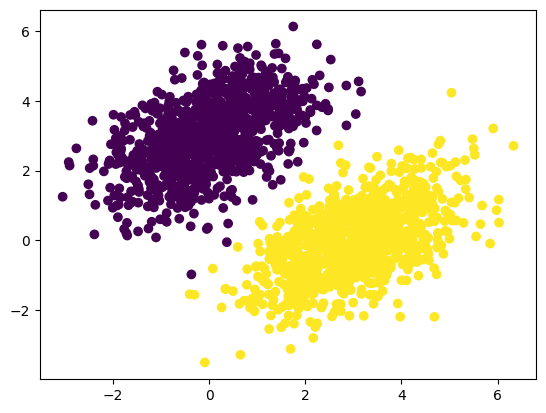

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

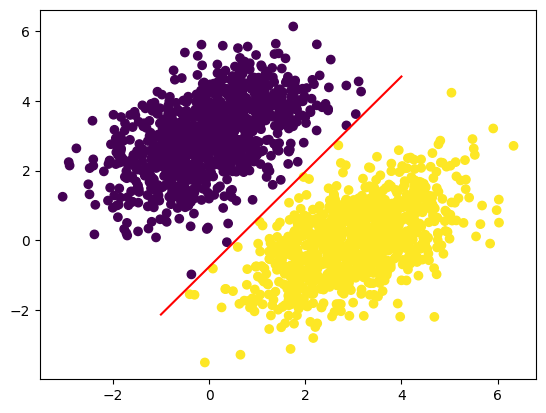

In [37]:
x = np.linspace(-1, 4, 100)
y = - w[0] /  w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

Anatomy of a neural network

In [42]:
from tensorflow import keras

class simpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                    initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                            initializer="zeros")
    
    def call(self, inputs):
            y = tf.matmul(inputs, self.W) + self.b
            if self.activation is not None:
                y = self.activation(y)
            return y

In [43]:
my_dense = simpleDense(units=32,activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [47]:
model = tf.keras.Sequential([
    simpleDense(32, activation='relu'),
    simpleDense(64, activation='relu'),
    simpleDense(32, activation='relu'),
    simpleDense(10)
])

In [48]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [49]:
# Alternatively, compile using optimizer and loss from keras API
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [50]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.0244 - loss: 10.0733  
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - binary_accuracy: 0.0313 - loss: 9.6857
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.0330 - loss: 9.2901  
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - binary_accuracy: 0.0269 - loss: 8.8924
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - binary_accuracy: 0.0368 - loss: 8.7455


In [51]:
history.history

{'binary_accuracy': [0.028999999165534973,
  0.029999999329447746,
  0.03099999949336052,
  0.032499998807907104,
  0.032499998807907104],
 'loss': [9.918485641479492,
  9.533700942993164,
  9.206172943115234,
  8.890246391296387,
  8.584287643432617]}

Validation

In [55]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])

incides_permutation  =np.random.permutation(len(inputs))
shuffled_inputs = inputs[incides_permutation]
shuffled_targets = targets[incides_permutation]

num_validation_smaples = int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_smaples]
val_targets = shuffled_targets[:num_validation_smaples]
training_inputs = shuffled_inputs[num_validation_smaples:]
training_targets  =shuffled_targets[num_validation_smaples:]

model.fit(training_inputs,training_targets,epochs=5,batch_size=16,validation_data=(val_inputs,val_targets))

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.0335 - loss: 12.3304 - val_binary_accuracy: 0.0233 - val_loss: 12.3262
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - binary_accuracy: 0.0258 - loss: 12.3333 - val_binary_accuracy: 0.0233 - val_loss: 12.1384
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - binary_accuracy: 0.0244 - loss: 12.6135 - val_binary_accuracy: 0.0250 - val_loss: 11.9520
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - binary_accuracy: 0.0253 - loss: 12.4982 - val_binary_accuracy: 0.0250 - val_loss: 11.7627
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - binary_accuracy: 0.0272 - loss: 11.8726 - val_binary_accuracy: 0.0250 - val_loss: 11.5766


Evaluation

In [56]:
loss_and_metrics = model.evaluate(val_inputs,val_targets,batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.0243 - loss: 11.8946 


In [57]:
print(predictions[:10])

tf.Tensor(
[[-0.10540566]
 [ 0.1976796 ]
 [ 0.2381243 ]
 [ 0.08638027]
 [-0.11814943]
 [-0.20360258]
 [-0.00548062]
 [ 0.35339323]
 [-0.2784969 ]
 [ 0.00380591]], shape=(10, 1), dtype=float32)
